In [1]:
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.0.46'
except AssertionError:
    print('pip install QUANTAXIS >= 1.0.46 请升级QUANTAXIS后再运行此示例')

QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.0.46
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##`````

In [2]:
print('首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库')

首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库


# QUANTAXIS 回测的一些基础知识

##  QA回测的核心是两个类

```
QA_BacktestBroker
QA_Account
```

##  回测数据的引入/迭代

```
QA.QA_fetch_stock_day_adv
QA.QA_fetch_stock_min_adv
```

##  指标的计算

```
DataStruct.add_func
```

##  对于账户的灵活运用

```
QA_Account
QA_Risk
QA_Portfolio
QA_PortfolioView
QA_User
```

## STEP1 初始化账户,初始化回测broker

In [3]:
Account=QA.QA_Account()
Broker=QA.QA_BacktestBroker()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.47 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [4]:
import warnings

In [5]:
# 打印账户的信息
try:
    from pprint import  pprint as print
except:
    pass
print(Account.message)

{'account_cookie': 'Acc_d9qTFCfN',
 'allow_sellopen': False,
 'allow_t0': False,
 'broker': 'backtest',
 'cash': [1000000],
 'commission_coeff': 0.00025,
 'current_time': None,
 'history': [],
 'init_assets': {'cash': 1000000, 'hold': {}},
 'margin_level': False,
 'market_type': 'stock_cn',
 'portfolio_cookie': None,
 'quantaxis_version': '1.0.46',
 'running_environment': 'backtest',
 'running_time': datetime.datetime(2018, 6, 11, 22, 56, 3, 784593),
 'source': 'account',
 'strategy_name': None,
 'tax_coeff': 0.0015,
 'trade_index': [],
 'user_cookie': None}


## 首先讲解Account类:

QA_Account在初始化的时候,可以自己指定很多信息:

```

    QA_Account(
        strategy_name=None, user_cookie=None, portfolio_cookie=None, account_cookie=None,
        market_type=MARKET_TYPE.STOCK_CN, frequence=FREQUENCE.DAY, broker=BROKER_TYPE.BACKETEST,
        init_hold={}, init_cash=1000000, commission_coeff=0.00025, tax_coeff=0.0015,
        margin_level=False, allow_t0=False, allow_sellopen=False,
        running_environment=RUNNING_ENVIRONMENT.BACKETEST)

        :param [str] strategy_name:  策略名称
        :param [str] user_cookie:   用户cookie
        :param [str] portfolio_cookie: 组合cookie
        :param [str] account_cookie:   账户cookie

        :param [dict] init_hold         初始化时的股票资产
        :param [float] init_cash:         初始化资金
        :param [float] commission_coeff:  交易佣金 :默认 万2.5   float 类型
        :param [float] tax_coeff:         印花税   :默认 千1.5   float 类型

        :param [Bool] margin_level:      保证金比例 默认False
        :param [Bool] allow_t0:          是否允许t+0交易  默认False
        :param [Bool] allow_sellopen:    是否允许卖空开仓  默认False

        :param [QA.PARAM] market_type:   市场类别 默认QA.MARKET_TYPE.STOCK_CN A股股票
        :param [QA.PARAM] frequence:     账户级别 默认日线QA.FREQUENCE.DAY
        :param [QA.PARAM] broker:        BROEKR类 默认回测 QA.BROKER_TYPE.BACKTEST
        :param [QA.PARAM] running_environment 当前运行环境 默认Backtest

        # 2018/06/11 init_assets 从float变为dict,并且不作为输入,作为只读属性
        #  :param [float] init_assets:       初始资产  默认 1000000 元 （100万）
        init_assets:{
            cash: xxx,
            stock: {'000001':2000},
            init_date: '2018-02-05',
            init_datetime: '2018-02-05 15:00:00'
        }
        # 2018/06/11 取消在初始化的时候的cash和history输入
        # :param [list] cash:              可用现金  默认 是 初始资产  list 类型
        # :param [list] history:           交易历史
```

In [6]:
# 重设账户初始资金

Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [7]:
Account.init_assets

{'cash': 200000, 'hold': {}}

Account 有很多方法,暂时不详细展开,我们先直接进入下一步

# SETP2:引入回测的市场数据

引入方法非常简单,直接使用QA_fetch_stock_day_adv系列即可

- code 可以是多种多样的选取方式

```python
1. QA.QA_fetch_stock_list_adv().code.tolist() # 获取全市场的股票代码
2. QA.QA_fetch_stock_block_adv().get_block('云计算').code  # 按版块选取
3. code= ['000001','000002'] # 自己指定
```
- 数据获取后,to_qfq() 即可获得前复权数据

```python
data=DataSturct.to_qfq()
```

In [8]:
# QA.QA_fetch_stock_list_adv().code.tolist()
# QA.QA_fetch_stock_block_adv().get_block('云计算').code
codelist=QA.QA_fetch_stock_block_adv().get_block('云计算').code

In [9]:
data=QA.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')

In [10]:
data

< QA_DataStruct_Stock_day with 65 securities >

In [11]:
data=data.to_qfq()

e:\quantaxis\QUANTAXIS\QAData\QADataStruct.py:114: FutureWarning: 'code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  self.data.groupby('code').apply(QA_data_stock_to_fq), self.type, 'qfq')


In [12]:
# data.data

## STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 [QUANTAXIS的指标系统](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/indicators.md)

In [13]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

In [14]:
ind=data.add_func(MACD_JCSC)

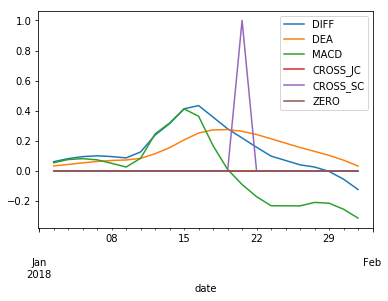

In [15]:
ind.xs(codelist[0],level=1)['2018-01'].plot()

In [16]:
ind.xs(codelist[0],level=1)['2018-01']

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,,,,,,
2018-01-02,0.062832,0.034908,0.055848,0,0,0
2018-01-03,0.083081,0.044543,0.077076,0,0,0
2018-01-04,0.096405,0.054915,0.082979,0,0,0
2018-01-05,0.101761,0.064284,0.074953,0,0,0
2018-01-08,0.096831,0.070794,0.052074,0,0,0
2018-01-09,0.087880,0.074211,0.027338,0,0,0
2018-01-10,0.127678,0.084904,0.085548,0,0,0
2018-01-11,0.239488,0.115821,0.247333,0,0,0
2018-01-12,0.315590,0.155775,0.319631,0,0,0


In [17]:
QA.__version__>'1.0.42'

True

In [18]:
ind.loc['2018-01',slice(None)]

DIFF       DEA      MACD  CROSS_JC  CROSS_SC  ZERO
date       code                                                          
2018-01-02 000021  0.062832  0.034908  0.055848         0         0     0
           000066 -0.103693 -0.164662  0.121938         0         0     0
           000070 -0.298122 -0.297769 -0.000706         0         0     0
           000611  0.085137  0.038461  0.093353         0         0     0
           000836 -0.094147       NaN       NaN         0         0     0
           000938  1.251292  0.414957  1.672669         0         0     0
           000977  0.147007  0.089165  0.115685         0         0     0
           002063 -0.000718 -0.041517  0.081599         0         0     0
           002065 -0.330897 -0.311772 -0.038251         0         0     0
           002093  0.071611  0.040341  0.062539         0         0     0
           002095 -0.141841 -0.246130  0.208579         0         0     0
           002195 -0.150915 -0.158826  0.015820         1         0     0
           002197 -0.039920 -0.026400 -0.027039         0         0     0
           002268 -0.282747 -0.095097 -0.375300         0         0     0
           002315 -0.741722 -0.618039 -0.247365         0         0     0
           002368 -0.415162 -0.345593 -0.139139         0         0     0
           002396 -0.372709 -0.313333 -0.118752         0         0     0
           002544 -0.707862 -0.720709  0.025694         1         0     0
           002642 -0.391450 -0.475347  0.167794         0         0     0
           002657 -0.449625 -0.507392  0.115533         0         0     0
           300002 -0.121268 -0.130608  0.018681         0         0     0
           300017  0.129319  0.011025  0.236589         0         0     0
           300020 -0.333697 -0.260338 -0.146716         0         0     0
           300036 -0.209178 -0.206702 -0.004952         0         0     0
           300051 -0.106807 -0.081844 -0.049927         0         0     0
           300188  0.250682  0.497559 -0.493753         0         0     0
           300229 -0.144834  0.025245 -0.340159         0         0     0
           300245 -0.144128 -0.121110 -0.046036         0         0     0
           300290 -0.154023 -0.166551  0.025057         1         0     0
           300297 -0.146436 -0.178916  0.064962         0         0     0
...                     ...       ...       ...       ...       ...   ...
2018-01-31 300366 -0.195730 -0.074191 -0.243077         0         0     0
           300379 -0.184565 -0.186722  0.004316         0         0     0
           300608 -0.347437 -0.370488  0.046103         0         0     0
           600037 -0.050774 -0.090620  0.079691         0         0     0
           600100 -0.030956 -0.033234  0.004556         0         0     0
           600105 -0.058149 -0.063739  0.011182         0         0     0
           600198 -0.463211 -0.483756  0.041092         0         0     0
           600289 -1.171529 -1.205996  0.068934         0         0     0
           600385 -0.338182 -0.307123 -0.062117         0         0     0
           600410 -0.088613 -0.075791 -0.025643         0         1     0
           600522 -0.557657 -0.468933 -0.177448         0         0     0
           600536 -0.648704 -0.408761 -0.479886         0         0     0
           600588  0.327150  0.199457  0.255386         0         0     0
           600589  0.004017  0.018157 -0.028280         0         1     0
           600590 -0.192047 -0.194900  0.005705         0         0     0
           600595 -0.069449 -0.013864 -0.111170         0         0     0
           600601 -0.071518 -0.047553 -0.047930         0         0     0
           600602 -0.020619  0.022803 -0.086844         0         0     0
           600718 -0.372869 -0.327002 -0.091732         0         0     0
           600728 -0.229074 -0.185714 -0.086721         0         0     0
           600756 -0.269601 -0.191433 -0.156336         0         0     0
           600770 -0.135974

# SETP4:选取回测的开始和结束日期,构建回测

In [19]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.data.code[0], 
                time=item.data.date[0], 
                amount=1000, 
                towards=QA.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )
            Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.data.code[0], 
                    time=item.data.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
    Account.settle()
            
        #break

{'header': {'source': 'market', 'status': 200, 'code': '002396', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_hPn7tNy1', 'trade_id': 'Trade_yc2L7wBH'}, 'body': {'order': {'price': 21.98, 'code': '002396', 'amount': 1000, 'date': '2018-01-04', 'datetime': '2018-01-04 15:00:00', 'towards': 1}, 'fee': {'commission': 5.495, 'tax': 0}}}
10119.367798208848
NOT ENOUGH MONEY FOR {'price': 21.98, 'code': '002396', 'amount': 1000, 'date': '2018-01-04', 'datetime': '2018-01-04 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300379', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_yVP2SIah', 'trade_id': 'Trade_ngrb8klA'}, 'body': {'order': {'price': 12.86, 'code': '300379', 'amount': 1000, 'date': '2018-01-04', 'datetime': '2018-01-04 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
10119.367798208848
NOT ENOUGH MONEY FOR {'price': 12.86, 'code': '300379', 'amount

{'header': {'source': 'market', 'status': 200, 'code': '600756', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_mt9Npov4', 'trade_id': 'Trade_8jDc7faC'}, 'body': {'order': {'price': 18.1, 'code': '600756', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
5475.842559725861
NOT ENOUGH MONEY FOR {'price': 18.1, 'code': '600756', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '600797', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_iFCAr1bq', 'trade_id': 'Trade_zidn34J9'}, 'body': {'order': {'price': 12.47, 'code': '600797', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
5475.842559725861
NOT ENOUGH MONEY FOR {'price': 12.47, 'code': '600797', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '300036', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_PcAJV6a4', 'trade_id': 'Trade_zH19UfG2'}, 'body': {'order': {'price': 13.75, 'code': '300036', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6343.697674546565
NOT ENOUGH MONEY FOR {'price': 13.75, 'code': '300036', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300229', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_nHFSkBeW', 'trade_id': 'Trade_nLD8uNUY'}, 'body': {'order': {'price': 12.36, 'code': '300229', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6343.697674546565
NOT ENOUGH MONEY FOR {'price': 12.36, 'code': '300229', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '603138', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_tAwVC0PM', 'trade_id': 'Trade_04KhadE3'}, 'body': {'order': {'price': 36.33, 'code': '603138', 'amount': 1000, 'date': '2018-02-23', 'datetime': '2018-02-23 15:00:00', 'towards': 1}, 'fee': {'commission': 9.0825, 'tax': 0}}}
1958.6976745465654
NOT ENOUGH MONEY FOR {'price': 36.33, 'code': '603138', 'amount': 1000, 'date': '2018-02-23', 'datetime': '2018-02-23 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '000021', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_PFXzp2cT', 'trade_id': 'Trade_9RDMQZn6'}, 'body': {'order': {'price': 8.5, 'code': '000021', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1958.6976745465654
NOT ENOUGH MONEY FOR {'price': 8.5, 'code': '000021', 'amount': 

{'header': {'source': 'market', 'status': 200, 'code': '601928', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Dp9Cewz3', 'trade_id': 'Trade_g8IEv2bm'}, 'body': {'order': {'price': 7.71, 'code': '601928', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1958.6976745465654
NOT ENOUGH MONEY FOR {'price': 7.71, 'code': '601928', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '603881', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_m6jO8cqI', 'trade_id': 'Trade_MCWaQck4'}, 'body': {'order': {'price': 35.38, 'code': '603881', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 8.844286727175001, 'tax': 0}}}
1958.6976745465654
NOT ENOUGH MONEY FOR {'price': 35.38, 'code': '603881

{'header': {'source': 'market', 'status': 200, 'code': '603138', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_1G2gLJmC', 'trade_id': 'Trade_PGJmWbAv'}, 'body': {'order': {'price': 42.38, 'code': '603138', 'amount': 1000, 'date': '2018-03-27', 'datetime': '2018-03-27 15:00:00', 'towards': 1}, 'fee': {'commission': 10.595, 'tax': 0}}}
32228.835924940286
NOT ENOUGH MONEY FOR {'price': 42.38, 'code': '603138', 'amount': 1000, 'date': '2018-03-27', 'datetime': '2018-03-27 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '002315', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_bwYQHIPA', 'trade_id': 'Trade_otclXYBN'}, 'body': {'order': {'price': 20.86, 'code': '002315', 'amount': 1000, 'date': '2018-03-29', 'datetime': '2018-03-29 15:00:00', 'towards': 1}, 'fee': {'commission': 5.215, 'tax': 0}}}
13326.280924940282
NOT ENOUGH MONEY FOR {'price': 20.86, 'code': '002315', 'a

{'header': {'source': 'market', 'status': 200, 'code': '600602', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_hUYmngoX', 'trade_id': 'Trade_bkKxpGTB'}, 'body': {'order': {'price': 7.88, 'code': '600602', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
3331.2809249402817
NOT ENOUGH MONEY FOR {'price': 7.88, 'code': '600602', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '600797', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_TuOndkWq', 'trade_id': 'Trade_T1biEfs2'}, 'body': {'order': {'price': 12.48, 'code': '600797', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
3331.2809249402817
NOT ENOUGH MONEY FOR {'price': 12.48, 'code': '600797', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '600410', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_0T57E2Ne', 'trade_id': 'Trade_IGDsZxca'}, 'body': {'order': {'price': 12.36, 'code': '600410', 'amount': 1000, 'date': '2018-04-16', 'datetime': '2018-04-16 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
713.0335307482455
NOT ENOUGH MONEY FOR {'price': 12.36, 'code': '600410', 'amount': 1000, 'date': '2018-04-16', 'datetime': '2018-04-16 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '600756', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Bf96KEqe', 'trade_id': 'Trade_apRDiJvC'}, 'body': {'order': {'price': 18.96, 'code': '600756', 'amount': 1000, 'date': '2018-04-16', 'datetime': '2018-04-16 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
713.0335307482455
NOT ENOUGH MONEY FOR {'price': 18.96, 'code': '600756', 'amount': 100

## STEP5: 分析账户

In [20]:
Account.history

[['2018-01-02 15:00:00',
  '002195',
  5.91,
  1000.0,
  'Order_29v1dkVP',
  'Trade_yV2tHJjR',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '002544',
  15.85,
  1000.0,
  'Order_ChqoKZuH',
  'Trade_SBv4rXPD',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '300290',
  8.71,
  1000.0,
  'Order_FHB5xcTO',
  'Trade_bGWy4gOt',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '600105',
  6.58,
  1000.0,
  'Order_RnevOPLr',
  'Trade_VQA9qbDP',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '600797',
  11.87,
  1000.0,
  'Order_O7Fb0N81',
  'Trade_Ka6RbPgt',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-03 15:00:00',
  '000070',
  9.52,
  1000.0,
  'Order_TIeqMJLy',
  'Trade_gEM5xY3i',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-03 15:00:00',
  '002065',
  8.53,
  1000.0,
  'Order_n7mY6CyO',
  'Trade_3xMrg4Cy',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-03 15:00:00',
  '300036',
  15.78,
  1000.0,
  'Order_xnVlC37F',
  'Trade_0tjziFnP',
  'JCS

In [21]:
Account.history_table

,datetime,code,price,amount,order_id,trade_id,account_cookie,commission,tax
0,2018-01-02 15:00:00,002195,5.91,1000.0,Order_29v1dkVP,Trade_yV2tHJjR,JCSC_EXAMPLE,5.000000,0.000000
1,2018-01-02 15:00:00,002544,15.85,1000.0,Order_ChqoKZuH,Trade_SBv4rXPD,JCSC_EXAMPLE,5.000000,0.000000
2,2018-01-02 15:00:00,300290,8.71,1000.0,Order_FHB5xcTO,Trade_bGWy4gOt,JCSC_EXAMPLE,5.000000,0.000000
3,2018-01-02 15:00:00,600105,6.58,1000.0,Order_RnevOPLr,Trade_VQA9qbDP,JCSC_EXAMPLE,5.000000,0.000000
4,2018-01-02 15:00:00,600797,11.87,1000.0,Order_O7Fb0N81,Trade_Ka6RbPgt,JCSC_EXAMPLE,5.000000,0.000000
5,2018-01-03 15:00:00,000070,9.52,1000.0,Order_TIeqMJLy,Trade_gEM5xY3i,JCSC_EXAMPLE,5.000000,0.000000
6,2018-01-03 15:00:00,002065,8.53,1000.0,Order_n7mY6CyO,Trade_3xMrg4Cy,JCSC_EXAMPLE,5.000000,0.000000
7,2018-01-03 15:00:00,300036,15.78,1000.0,Order_xnVlC37F,Trade_0tjziFnP,JCSC_EXAMPLE,5.000000,0.000000
8,2018-01-03 15:00:00,600198,11.65,1000.0,Order_uw8lRBKy,Trade_F0krZ2WH,JCSC_EXAMPLE,5.000000,0.000000
9,2018-01-03 15:00:00,600718,15.00,1000.0,Order_ABHm4WDq,Trade_SVEaJg84,JCSC_EXAMPLE,5.000000,0.000000


In [22]:
Account.daily_hold

,code,000066,000070,000611,000836,000977,002063,002065,002095,002195,002197,...,600601,600718,600756,600770,600797,600804,600845,600850,603019,603138
date,account_cookie,,,,,,,,,,,,,,,,,,,,,
2018-01-02,JCSC_EXAMPLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,...,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,1000.0,0.0,0.0,1000.0,1000.0,0.0,1000.0,1000.0,0.0
2018-01-05,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,1000.0,0.0,0.0,1000.0,1000.0,0.0,1000.0,1000.0,0.0
2018-01-10,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,1000.0,0.0,0.0,1000.0,1000.0,0.0,0.0,1000.0,0.0
2018-01-11,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0,...,1000.0,1000.0,0.0,0.0,1000.0,1000.0,0.0,0.0,1000.0,0.0
2018-01-15,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,1000.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0
2018-01-16,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0
2018-01-17,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0
2018-01-19,JCSC_EXAMPLE,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,...,0.0,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0


In [23]:
Risk=QA.QA_Risk(Account)

e:\quantaxis\QUANTAXIS\QAData\QADataStruct.py:114: FutureWarning: 'code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  self.data.groupby('code').apply(QA_data_stock_to_fq), self.type, 'qfq')


In [24]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'portfolio_cookie': None,
 'user_cookie': None,
 'annualize_return': 0.07,
 'profit': 0.02,
 'max_dropback': 0.22,
 'time_gap': 77,
 'volatility': 0.83,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.26,
 'bn_profit': -0.07,
 'beta': 1.0,
 'alpha': 0.33,
 'sharpe': 0.02,
 'init_cash': '200000.00',
 'last_assets': '204497.60'}

In [25]:
Risk.assets

date
2018-01-02    199975.000000
2018-01-03    200679.367798
2018-01-05    191164.367798
2018-01-10    187760.515298
2018-01-11    202340.515298
2018-01-15    189316.677560
2018-01-16    189833.585060
2018-01-17    187938.585060
2018-01-19    188043.870060
2018-01-22    189519.217560
2018-01-23    181924.217560
2018-01-24    200345.842560
2018-01-26    198190.842560
2018-01-29    193573.772560
2018-01-30    194848.785060
2018-01-31    178983.377560
2018-02-01    186996.314850
2018-02-06    184640.553600
2018-02-12    187834.902675
2018-02-13    190619.555175
2018-02-14    189239.555175
2018-02-22    194563.697675
2018-02-23    192878.697675
2018-03-14    221235.480877
2018-03-15    212227.860551
2018-03-16    210632.860551
2018-03-19    212609.521801
2018-03-20    214408.851801
2018-03-21    212304.776801
2018-03-22    211804.009301
2018-03-23    205666.791257
2018-03-26    207276.195925
2018-03-27    213178.835925
2018-03-28    210206.280925
2018-03-29    212861.280925
2018-04-02    2

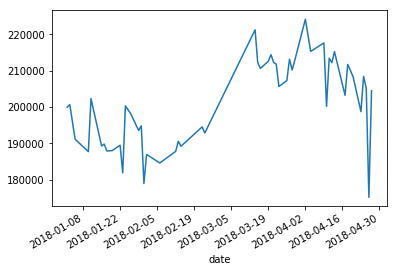

In [26]:
Risk.assets.plot()

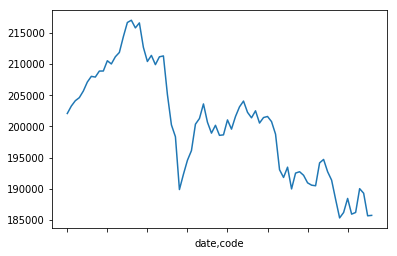

In [27]:
Risk.benchmark_assets.plot()

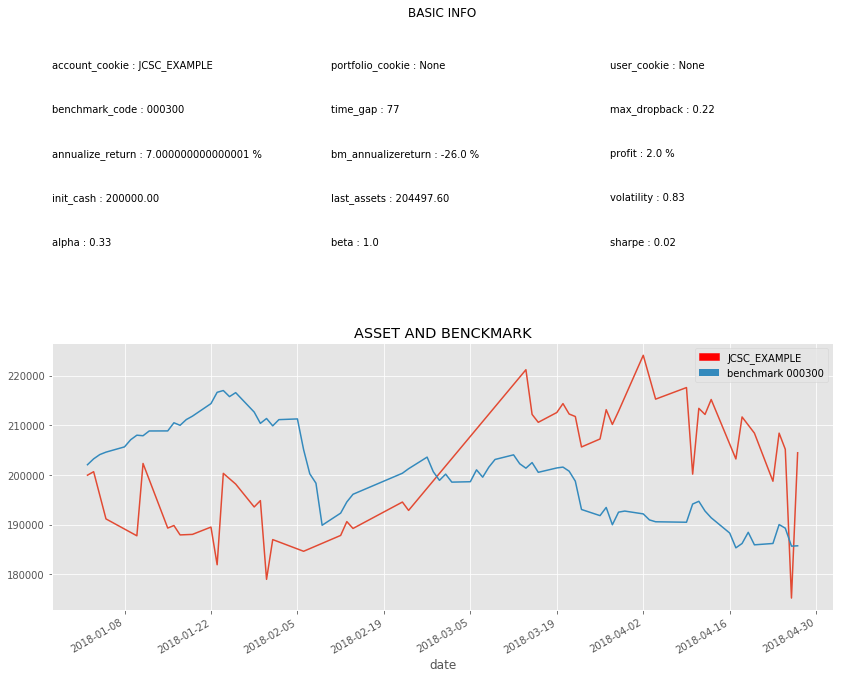

In [28]:
Risk.plot_assets_curve()

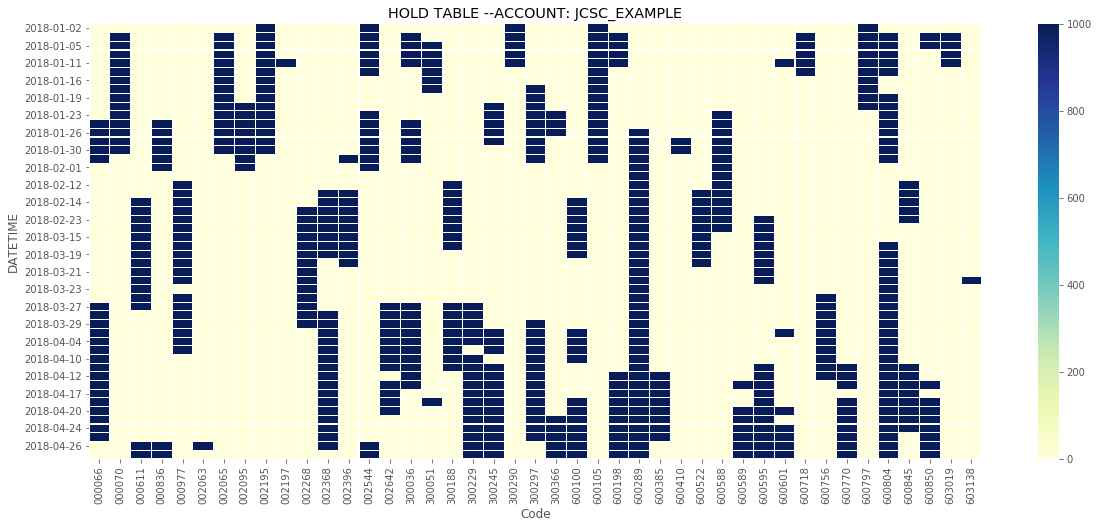

In [29]:
Risk.plot_dailyhold()

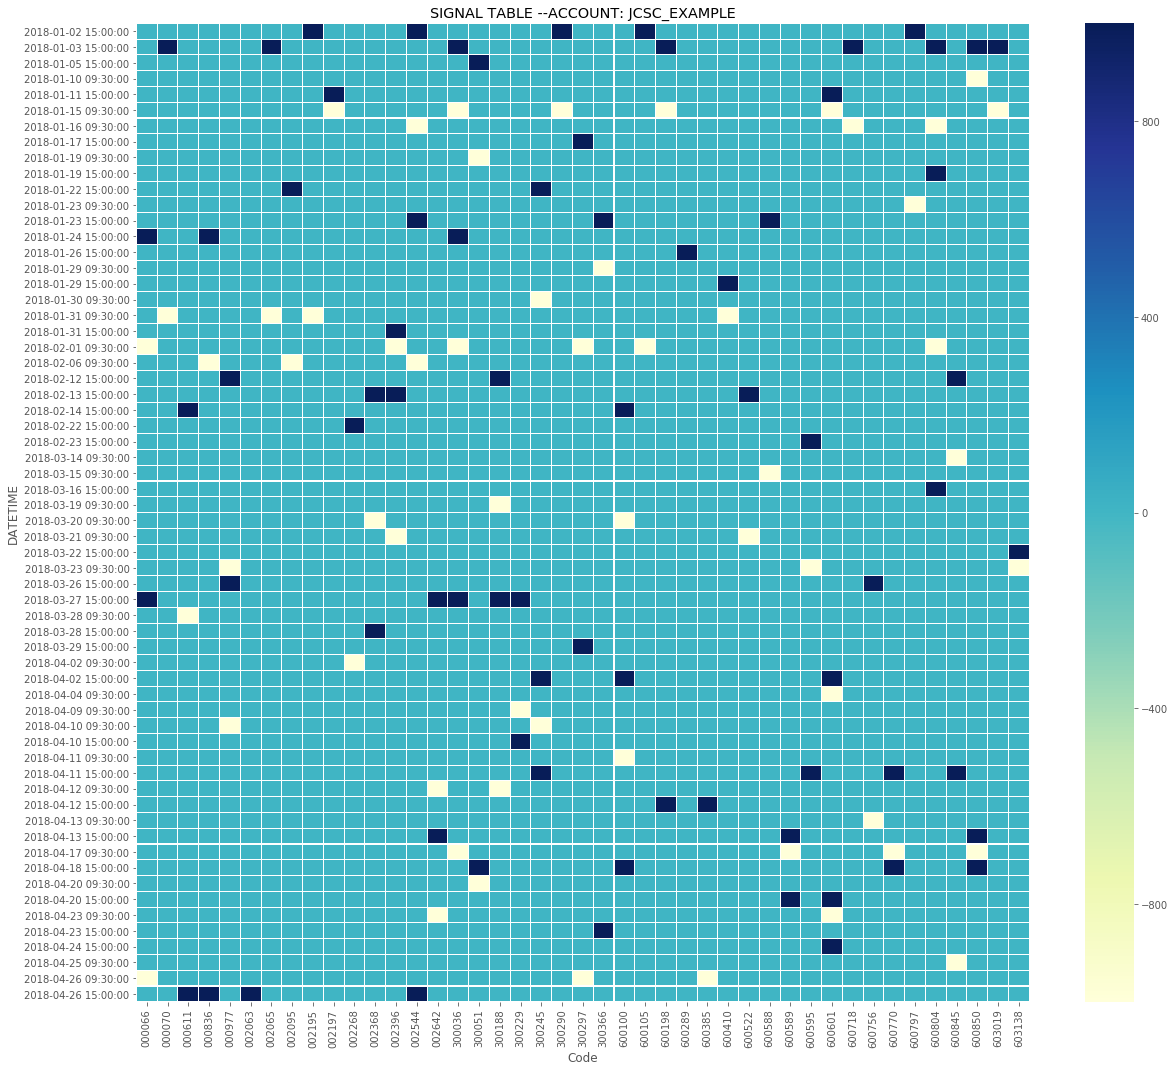

In [30]:
Risk.plot_signal()

In [31]:
Risk.profit_construct

{'total_buyandsell': 6599.99,
 'total_tax': -1372.19,
 'total_commission': -730.2,
 'total_profit': 4497.6}

In [32]:
Performance=QA.QA_Performance(Account)

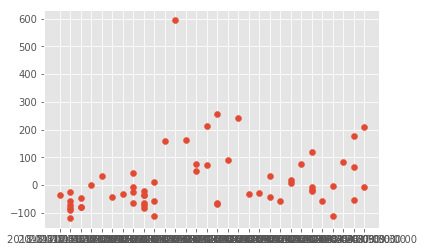

In [33]:
Performance.plot_pnlmoney(Performance.pnl_fifo)

## STEP6: 存储结果

In [34]:
Account.save()
Risk.save()

## STEP7: 查看存储的结果

In [35]:
account_info=QA.QA_fetch_account({'account_cookie':'JCSC_EXAMPLE'})

In [36]:
account=QA.QA_Account().from_message(account_info[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.47 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [37]:
account

< QA_Account JCSC_EXAMPLE>